In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,id,title,genres,averageRating,numVotes,releaseYear
0,tt0111161,The Shawshank Redemption,Drama,9.3,2952034,1994
1,tt0068646,The Godfather,"Crime, Drama",9.2,2057905,1972
2,tt0252487,The Chaos Class,Comedy,9.2,43579,1975
3,tt0259534,Ramayana: The Legend of Prince Rama,"Action, Adventure, Animation",9.2,15415,1993
4,tt16747572,The Silence of Swastika,"Documentary, History",9.2,10567,2021


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   object 
 1   title          1000 non-null   object 
 2   genres         1000 non-null   object 
 3   averageRating  1000 non-null   float64
 4   numVotes       1000 non-null   int64  
 5   releaseYear    1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [5]:
df.describe()

,averageRating,numVotes,releaseYear
count,1000.000000,1.000000e+03,1000.000000
mean,8.136600,2.764203e+05,1992.287000
std,0.254215,4.273576e+05,25.646762
min,7.800000,1.012800e+04,1920.000000
25%,8.000000,2.229700e+04,1974.750000
50%,8.100000,6.672900e+04,2001.000000
75%,8.200000,3.804790e+05,2014.000000
max,9.300000,2.952034e+06,2024.000000


c:\Users\spn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


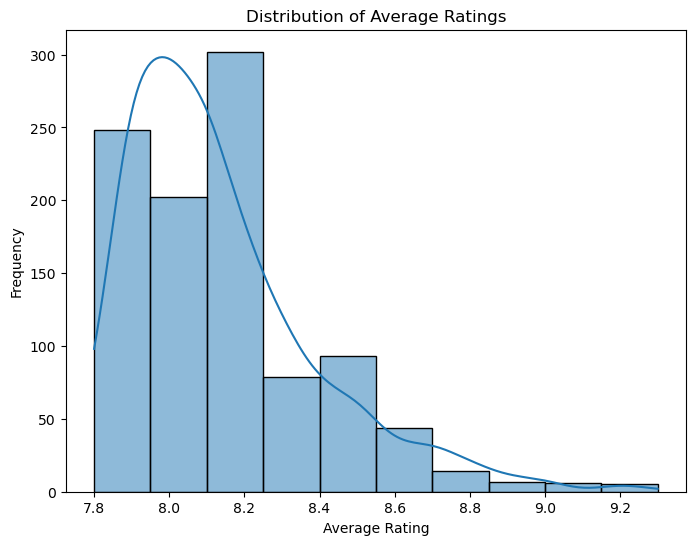

In [7]:
plt.figure(figsize=(8,6))
sns.histplot(df['averageRating'], bins=10, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

In [9]:
top_rated = df.nlargest(10, 'averageRating')[['title', 'averageRating', 'numVotes']]

top_rated

,title,averageRating,numVotes
0,The Shawshank Redemption,9.3,2952034
1,The Godfather,9.2,2057905
2,The Chaos Class,9.2,43579
3,Ramayana: The Legend of Prince Rama,9.2,15415
4,The Silence of Swastika,9.2,10567
5,The Dark Knight,9.0,2933285
6,The Lord of the Rings: The Return of the King,9.0,2020924
7,Schindler's List,9.0,1480923
8,The Godfather Part II,9.0,1390693
9,12 Angry Men,9.0,888530


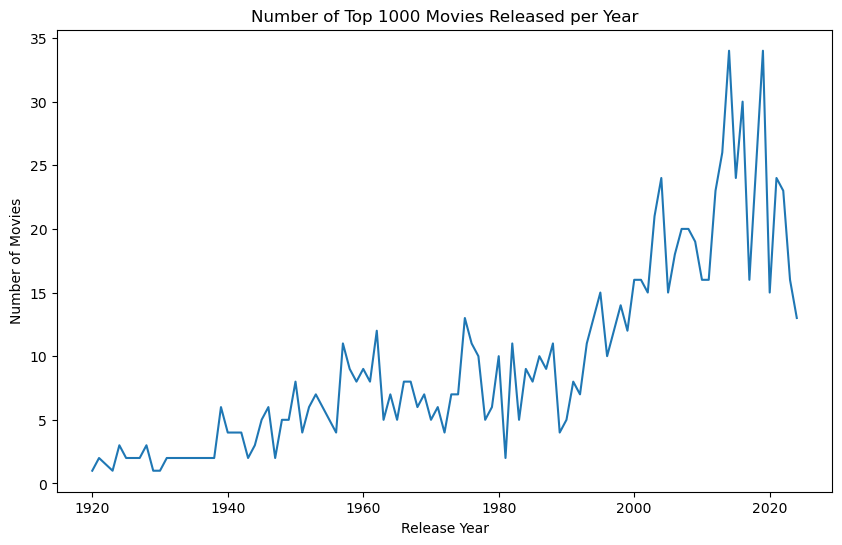

In [12]:
# Number of movies released per year
movies_per_year = df.groupby('releaseYear')['title'].count()
plt.figure(figsize=(10,6))
movies_per_year.plot(kind='line')
plt.title('Number of Top 1000 Movies Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

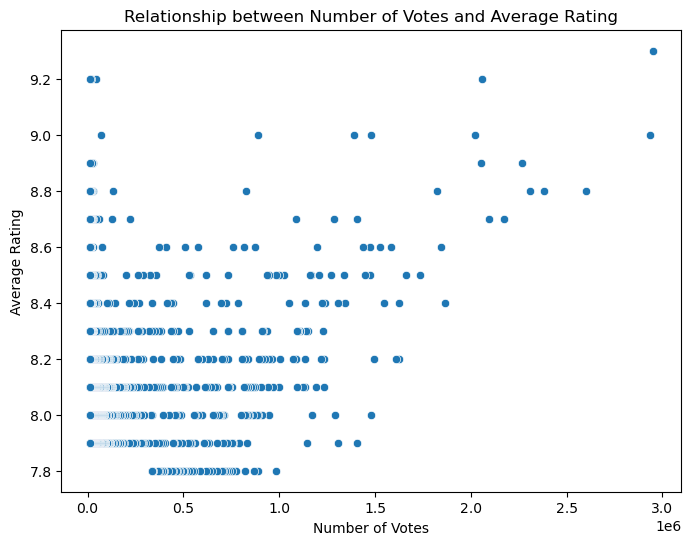

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='numVotes', y='averageRating', data=df)
plt.title('Relationship between Number of Votes and Average Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.show()

In [17]:
unique_genres = df['genres'].str.split(',').explode().unique()
unique_genres

array(['Drama', 'Crime', ' Drama', 'Comedy', 'Action', ' Adventure',
       ' Animation', 'Documentary', ' History', ' Crime', 'Biography',
       ' Romance', ' Mystery', ' Thriller', ' Documentary', ' Biography',
       ' Sci-Fi', 'Adventure', ' Western', ' Fantasy', ' Family',
       ' Musical', ' Comedy', ' Music', ' Horror', ' War', 'Horror',
       'Mystery', 'Animation', ' Sport', ' Film-Noir', ' News',
       'Film-Noir', 'Western'], dtype=object)

In [22]:
genre_combinations = df['genres'].value_counts()

genre_combinations.head(10)

genres
Drama                        93
Drama, Romance               41
Comedy, Drama, Romance       33
Comedy, Drama                33
Action, Crime, Drama         32
Crime, Drama, Thriller       32
Crime, Drama                 22
Crime, Drama, Mystery        22
Drama, War                   19
Biography, Drama, History    18
Name: count, dtype: int64

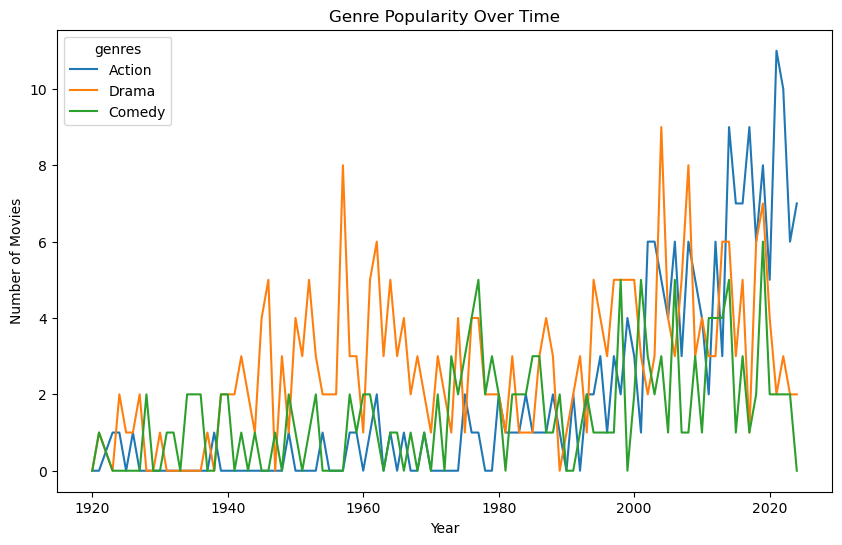

In [23]:
genres_per_year = df[['releaseYear', 'genres']].copy()
genres_per_year['genres'] = genres_per_year['genres'].str.split(',')
genres_per_year = genres_per_year.explode('genres')

# Group by year and genre to count occurrences
genre_trends = genres_per_year.groupby(['releaseYear', 'genres']).size().unstack(fill_value=0)

# Plot the trend of some popular genres over time
genre_trends[['Action', 'Drama', 'Comedy']].plot(figsize=(10,6))
plt.title('Genre Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [26]:
# Count the number of genres per movie
df['num_genres'] = df['genres'].str.split(',').apply(len)

# Find movies with the highest number of genres
most_diverse_movies = df.nlargest(10, 'num_genres')[['title', 'genres', 'num_genres']]
most_diverse_movies

,title,genres,num_genres
3,Ramayana: The Legend of Prince Rama,"Action, Adventure, Animation",3
5,The Dark Knight,"Action, Crime, Drama",3
6,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",3
7,Schindler's List,"Biography, Drama, History",3
10,Kaiva,"Action, Drama, Romance",3
12,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama",3
13,Mirror Game,"Crime, Mystery, Thriller",3
16,O.J.: Made in America,"Biography, Crime, Documentary",3
17,The Message,"Action, Adventure, Biography",3
18,Inception,"Action, Adventure, Sci-Fi",3
